In [4]:
import numpy as np
import pandas as pd
import math
from scipy.stats import t
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot

In [5]:
# generating the kendall-tau correlation matrix

data = pd.read_csv ("C:/Users/anirbighosh/Documents/CQF/Final Project/data files/corr.csv")
cols = ['BAC_return', 'CITI_return', 'GS_return', 'JPMC_return', 'MS_return' ]
data = data[cols]
corr = data.corr(method='kendall')
corr = corr.apply(lambda x: np.sin(0.5 * math.pi *x))
#print(data)

In [6]:
# converting the data to uniform before being passed to the log_likelihood function

from sklearn.preprocessing import QuantileTransformer
quantile = QuantileTransformer(output_distribution='uniform', n_quantiles = 940)
data_trans = pd.DataFrame(quantile.fit_transform(data))
# dropping rows with U = 0 or 1
idx = np.where((data_trans[0]== 0) | (data_trans[0]== 1) | (data_trans[1]== 0) | (data_trans[1]== 1)|
               (data_trans[2]== 0) | (data_trans[2]== 1) | (data_trans[3]== 0) | (data_trans[3]== 1)|
               (data_trans[4]== 0) | (data_trans[4]== 1))                         
data_trans.drop(data_trans.index[idx], inplace = True)
n = data_trans.shape[0]
k = data_trans.shape[1]

In [55]:
def plot_log_likelihood():
    
    result = []
    v = range (1, 25, 1)
    
    for i in v:
        LL = 0
        for j in range(n):
            LL = LL + np.log(t_copula_density(data_trans.iloc[j,], corr, i))
        result.append(LL)
        
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(v, result)
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25])
    fig.show()

In [56]:
def t_copula_density(U, corr, v):
    
    first_term = (1 / math.sqrt(np.linalg.det(corr))) * (math.gamma((v+k)/2)/math.gamma(v/2)) * (math.gamma(v/2)/math.gamma((v+1)/2))**k
    numerator = (1 + multi_dot([t.ppf(U.transpose(),v),np.linalg.inv(corr),t.ppf(U, v)])/v) ** (-(v+k)/2)
    
    denominator = 1
    for i in range(k):
        denominator = denominator * (1 + (t.ppf(U[i],v))**2/v) ** (-(v+1)/2)      
    result = first_term * (numerator/denominator)
    
    return  result

C:\Users\anirbighosh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


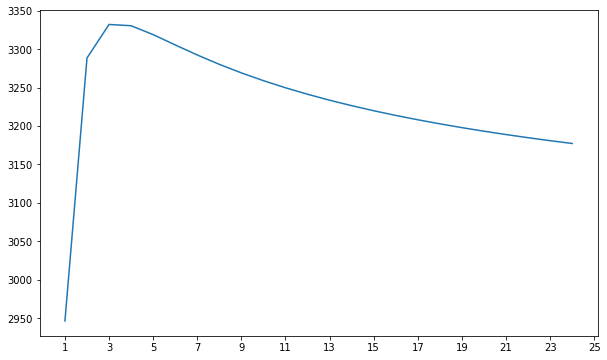

In [57]:
plot_log_likelihood()